<a href="https://colab.research.google.com/github/klajosw/python/blob/master/kl_py_sankey_matplotlib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<p align="left"> 
    <img src="https://raw.githubusercontent.com/klajosw/python/master/kl_mie_python_logo_250.jpg" 
         align="left" width="251" height="251">
    
</p>


<p> </p>



# Python alapok Sankey diagram Matplotlib és Plotly használata

<https://klajosw.blogspot.com/>


---

---

## Matplotlib használata

---


In [2]:
import matplotlib as mpl
import matplotlib.sankey as sankey
import pandas as pd

Text(0.5, 1.0, 'Sankey0')

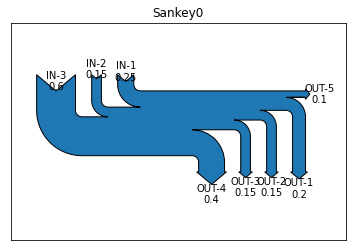

In [3]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

Sankey(flows=[0.25, 0.15, 0.60,                        ## +1.00
              -0.20, -0.15, -0.15, -0.40, -0.10],      ## -1.00
       labels=['IN-1', 'IN-2', 'IN-3', 'OUT-1', 'OUT-2', 'OUT-3', 'OUT-4', 'OUT-5'],
       orientations=[1, 1, 1, -1, -1, -1, -1, 0]).finish()
plt.title("Sankey0")

Text(0.5, 1.0, 'Sankey1')

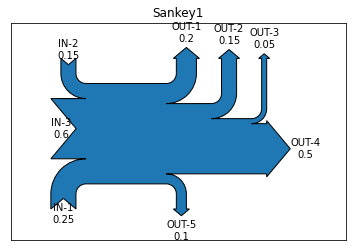

In [4]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

Sankey(flows=[0.25, 0.15, 0.60, 
              -0.20, -0.15, -0.05, -0.50, -0.10],
       labels=['IN-1', 'IN-2', 'IN-3', 'OUT-1', 'OUT-2', 'OUT-3', 'OUT-4', 'OUT-5'],
       orientations=[-1, 1, 0, 1, 1, 1, 0, -1]).finish()
plt.title("Sankey1")

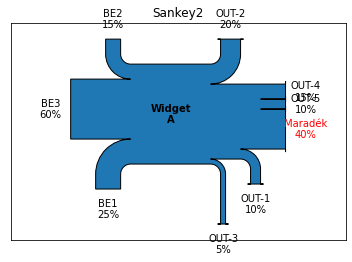

In [5]:

import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey


fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Sankey2")
sankey = Sankey(ax=ax, scale=0.01, offset=0.2, head_angle=180,
                format='%.0f', unit='%')
sankey.add(flows=[25, 15, 60, -10, -20, -5, -15, -10, -40],
           labels=['BE1', 'BE2', 'BE3', 'OUT-1', 'OUT-2', 'OUT-3', 'OUT-4', 'OUT-5', 'Maradék'],
           orientations=[-1, 1, 0, -1, 1, -1, 0, 0, 0],
           pathlengths=[0.25, 0.25, 0.25, 0.25, 0.25, 0.6, 0.25, 0.25,
                        0.25],
           patchlabel="Widget\nA")  # Arguments to matplotlib.patches.PathPatch
diagrams = sankey.finish()
diagrams[0].texts[-1].set_color('r')
diagrams[0].text.set_fontweight('bold')

Text(0.5, 1.0, 'Sankey3')

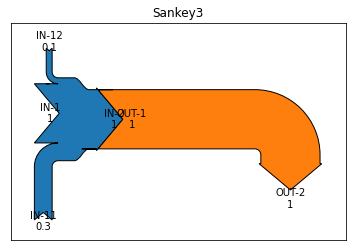

In [6]:
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey



sankey = Sankey()
# first diagram, indexed by prior=0
sankey.add(flows=[1, -1, 0.1, 0.3],
           orientations=[0, 0, 1, -1],
       labels=['IN-1', 'OUT-1', 'IN-12', 'IN-11'],
          pathlengths=[0, 0, 0.5, 1.0])
sankey.add(flows=[1, -1],
           orientations=[0, -1],
           labels=['IN-2', 'OUT-2'],
           trunklength=3.0,
          prior=0,
          connect=(1, 0))
sankey.finish()

plt.title("Sankey3")

(-69.52077081871323, 5.150000000000001)

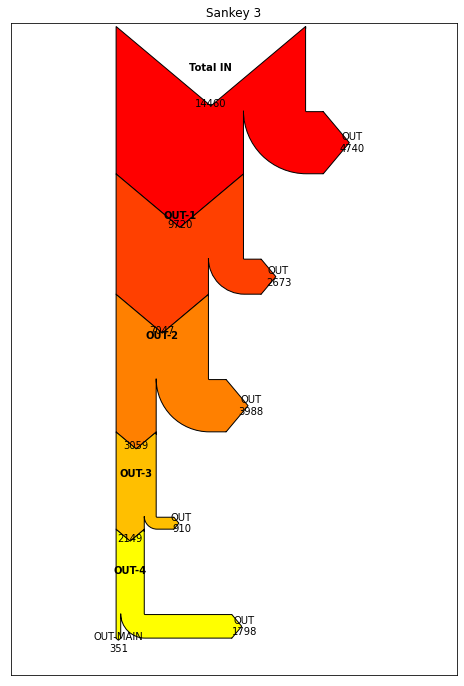

In [7]:
fig = plt.figure(figsize=(8, 12))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Sankey 3")
learners = [14460, 9720, 7047, 3059, 2149, 351]
labels = ["Total IN", "OUT-1", "OUT-2", "OUT-3", "OUT-4", "OUT-MAIN"]
colors = ["#FF0000", "#FF4000", "#FF8000", "#FFBF00", "#FFFF00"]

sankey = Sankey(ax=ax, scale=0.0015, offset=0.3)
for input_learner, output_learner, label, prior, color in zip(learners[:-1], learners[1:], 
                                                              labels, [None, 0, 1, 2, 3],
                                                             colors):
    if prior != 3:
        sankey.add(flows=[input_learner, -output_learner, output_learner - input_learner],
               orientations=[0, 0, 1],
               patchlabel=label,
               labels=['', None, 'OUT'],
              prior=prior,
              connect=(1, 0),
               pathlengths=[0, 0, 2],
              trunklength=10.,
              rotation=-90,
                  facecolor=color)
    else:
        sankey.add(flows=[input_learner, -output_learner, output_learner - input_learner],
               orientations=[0, 0, 1],
               patchlabel=label,
               labels=['', labels[-1], 'OUT'],
              prior=prior,
              connect=(1, 0),
               pathlengths=[0, 0, 10],
              trunklength=10.,
              rotation=-90,
                  facecolor=color)
diagrams = sankey.finish()
for diagram in diagrams:
    diagram.text.set_fontweight('bold')
    diagram.text.set_fontsize('10')
    for text in diagram.texts:
        text.set_fontsize('10')
ylim = plt.ylim()
plt.ylim(ylim[0]*1.05, ylim[1])

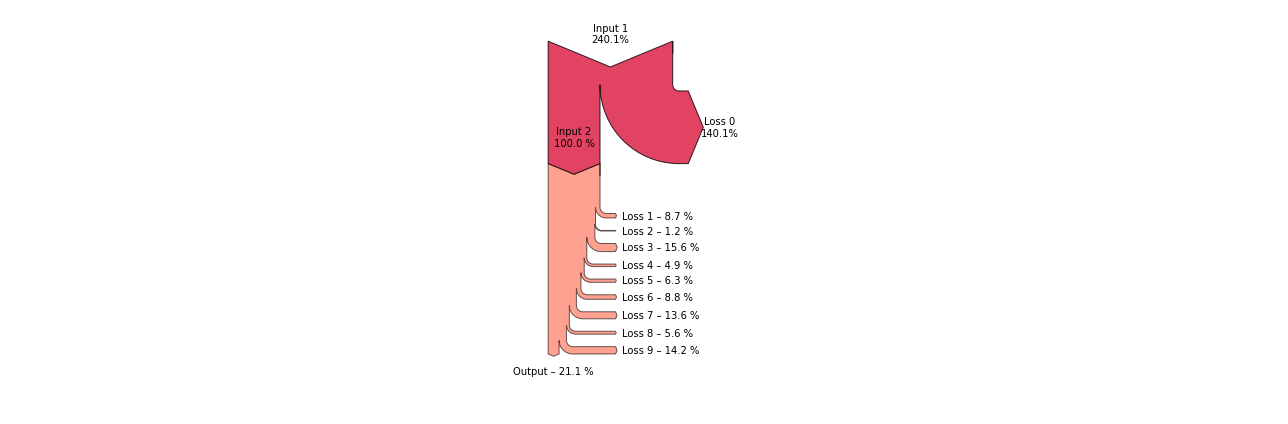

In [8]:
from matplotlib import pyplot as plt
from matplotlib.sankey import Sankey
from random import randint

Input = 240.1
L0 = 140.1
F9 = 21.1
L = [randint(1,300) for _ in range(9)]
norm_factor = (Input - L0 - F9) / sum(L)

flows_s2 = [Input - L0] + [-l * norm_factor for l in L] + [-F9]
labels_s2 = ['Input 2', 'Loss 1', 'Loss 2', 'Loss 3', 'Loss 4', 'Loss 5', 'Loss 6', 'Loss 7', 'Loss 8', 'Loss 9',
             'Output']
labels_s2_long = [f'{label}\n{flow} %' for label, flow in zip(labels_s2[:1], flows_s2)]
labels_s2_long += [f'{label} – {-flow:.1f} %' for label, flow in zip(labels_s2[1:], flows_s2[1:])]

fig = plt.figure(figsize=(18, 6))
ax = fig.add_subplot(1, 1, 1)
plt.axis('off')
sankey = Sankey(ax=ax,
                scale=2 / Input,
                offset=0.6,
                head_angle=135,
                shoulder=0,
                gap=0.2,
                radius=0.1,
                format='%.1f',
                unit='%')
s0 = sankey.add(flows=[Input, -L0, -(Input - L0)],
                labels=['Input 1', 'Loss 0', ''],
                orientations=[0, 1, 0],
                trunklength=1,
                rotation=-90,
                fc='crimson', alpha=0.8)
sankey.format = ''
sankey.unit = ''
s1 = sankey.add(flows=flows_s2,
                labels=labels_s2_long,
                orientations=[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
                trunklength=1,
                rotation=-90,
                prior=0, connect=(2, 0),
                fc='tomato', alpha=0.6)
diagrams = sankey.finish()
for d in diagrams:
    for t in d.texts:
        text = t.get_text()
        if text[-1] == '\n':                           # remove empty line at the end, needed for centering
            t.set_text(text[:-1])
        t.set_fontsize(10)
        t.set_verticalalignment('center')
        if text[:4] == 'Loss' and text[:6] != 'Loss 0': # align all loss labels except loss 0
            t.set_horizontalalignment('left')
            xy = t.get_position()
            t.set_position(xy=(0.18, xy[1]))
        else:
            t.set_horizontalalignment('center')

diagrams[0].texts[0].set_position(xy=(0, 0.42))                                      # adjust position of input 1
diagrams[0].texts[1].set_position(xy=(1.75, diagrams[0].texts[1].get_position()[1])) # adjust pos. of loss 0
diagrams[0].texts[2].set_text('')                                                    # remove output 1 as it coincides with input 2
diagrams[1].texts[-1].set_position(xy=(diagrams[1].texts[-1].get_position()[0], -5)) # adjust pos. of output


plt.tight_layout()
plt.show()




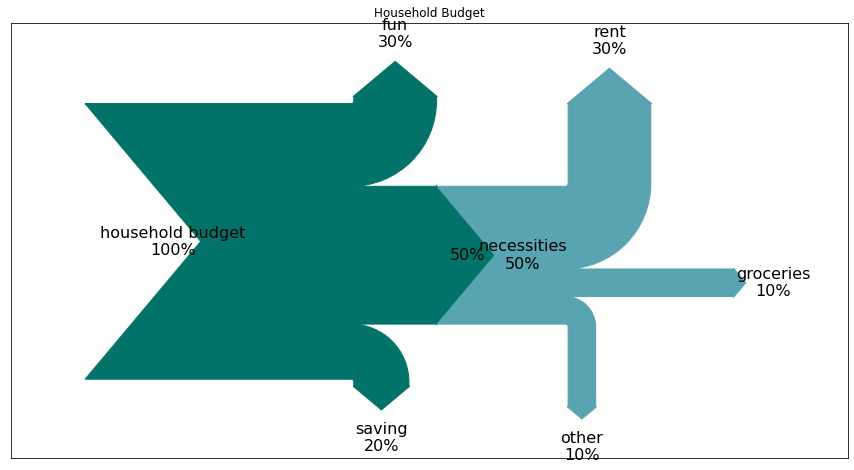

In [9]:
fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], 
                     title="Household Budget")
sankey = Sankey(ax=ax, scale=.1, offset=1, unit='%')
sankey.add(flows=[100, -50, -30, -20],
           labels=['household budget', 'necessities', 'fun', 
                   'saving'],
           orientations=[0, 0, 1, -1],
           trunklength = 10,
           edgecolor = '#027368',
           facecolor = '#027368')
sankey.add(flows=[50, -30, -10, -10], 
           labels=['','rent', 'groceries', 'other'],
           trunklength = 2,
           pathlengths = [3,3,3,3],
           orientations=[0, 1, 0, -1], 
           prior=0, #which sankey are you connecting to (0-indexed)
           connect=(1, 0), #flow number to connect: (prior, this)
           edgecolor = '#58A4B0',
           facecolor = '#58A4B0')
diagrams = sankey.finish()
for diagram in diagrams:
    for text in diagram.texts:
        text.set_fontsize(16);

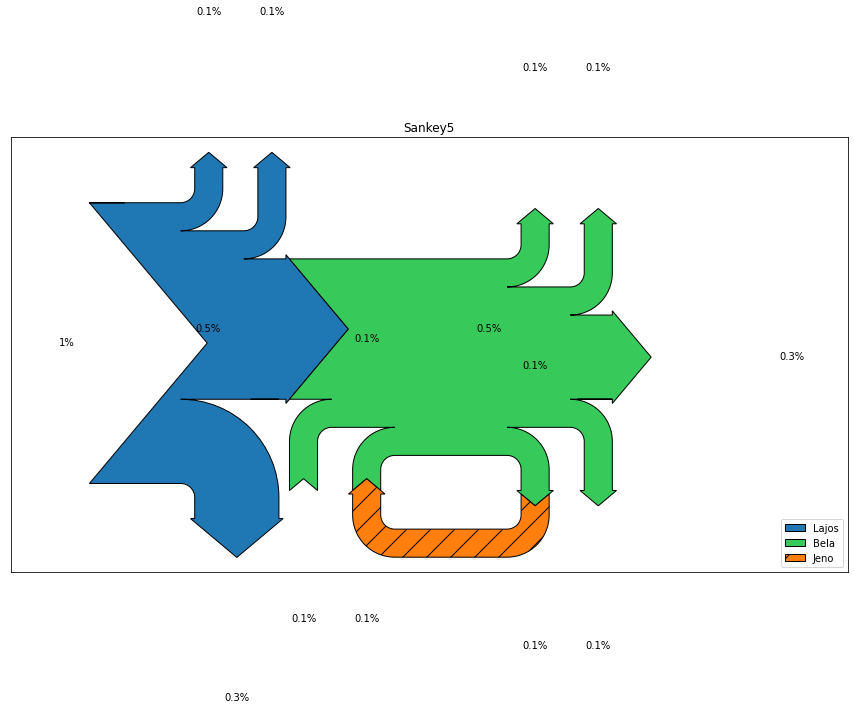

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

fig = plt.figure(figsize = (15,8))


ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[],
                     title="Sankey5")
#sankey = Sankey(ax=ax, unit=None)
sankey = Sankey(ax=ax, scale=2, offset=1, unit='%')
sankey.add(flows=[1.0, -0.3, -0.1, -0.1, -0.5],
     #      labels=['Lajos-1', 'Lajos-2', 'Lajos-3', 'Lajos-4', 'lajos-5'],
           label='Lajos',
           orientations=[0, -1, 1, 1, 0])
sankey.add(flows=[0.5, 0.1, 0.1, -0.1, -0.1, -0.1, -0.1, -0.3], fc='#37c959',
     #      labels=['Bela-1', 'Bela-2', 'Bela-3', 'Bela-4', 'Bela-5'],
           label='Bela',
           orientations=[0, -1, -1, 1, 1, -1, -1, 0], prior=0, connect=(4, 0))
sankey.add(flows=[-0.1, 0.1],
       label='Jeno',
       orientations=[-1,-1], prior=1, connect=(2, 0))
diagrams = sankey.finish()
diagrams[-1].patch.set_hatch('/')
plt.legend(loc='lower right')
plt.show()

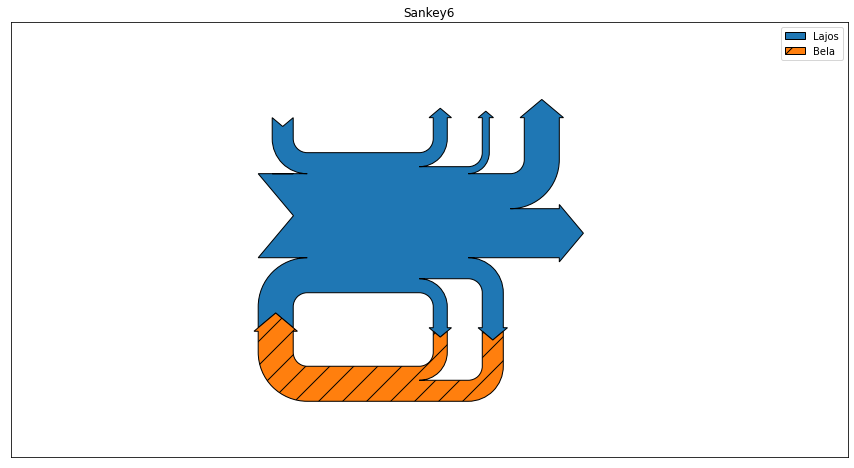

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.sankey import Sankey

fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1, 1, 1, xticks=[], yticks=[], title="Sankey6")
flows = [0.25, 0.15, 0.60, -0.10, -0.05, -0.25, -0.15, -0.10, -0.35]
sankey = Sankey(ax=ax, unit=None)
sankey.add(flows=flows, label='Lajos',
           orientations=[-1, 1, 0, 1, 1, 1, -1, -1, 0])
sankey.add(flows=[-0.25, 0.15, 0.1], label='Bela',
           orientations=[-1, -1, -1], prior=0, connect=(0, 0))
diagrams = sankey.finish()
diagrams[-1].patch.set_hatch('/')
plt.legend()
plt.show()

In [14]:
import plotly.graph_objects as go


opacity = 0.4

data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = ["A1", "A2", "B1", "B2", "C1", "C2"],
      color = ["red", "green", "blue", "orange", "yellow", "magenta"],
    ),
    # Add links
    link = dict(
      source = [0, 1, 0, 2, 3, 3], 
      target = [2, 3, 3, 4, 4, 5],
      value  = [8, 4, 2, 8, 4, 2],
      color = ["gold", "gold", "silver", "silver", "silver", "silver"]
  ))])

fig.update_layout(title_text="Sankey Diagram (plotly) 1", font_size=10)


fig.show()

---

## Plotly használata

---


In [13]:
import plotly.graph_objects as go
import urllib, json

url = 'https://raw.githubusercontent.com/plotly/plotly.js/master/test/image/mocks/sankey_energy.json'
response = urllib.request.urlopen(url)
data = json.loads(response.read())


opacity = 0.4

data['data'][0]['node']['color'] = ['rgba(255,0,255, 0.8)' if color == "magenta" else color for color in data['data'][0]['node']['color']]
data['data'][0]['link']['color'] = [data['data'][0]['node']['color'][src].replace("0.8", str(opacity))
                                    for src in data['data'][0]['link']['source']]

fig = go.Figure(data=[go.Sankey(
    valueformat = ".0f",
    valuesuffix = "TWh",
    # Define nodes
    node = dict(
      pad = 15,
      thickness = 15,
      line = dict(color = "black", width = 0.5),
      label =  data['data'][0]['node']['label'],
      color =  data['data'][0]['node']['color']
    ),
    # Add links
    link = dict(
      source =  data['data'][0]['link']['source'],
      target =  data['data'][0]['link']['target'],
      value =  data['data'][0]['link']['value'],
      label =  data['data'][0]['link']['label'],
      color =  data['data'][0]['link']['color']
))])

fig.update_layout(title_text="Sankey 9",
                  font_size=10)
fig.show()

In [15]:
import plotly.graph_objects as go

fig = go.Figure(go.Sankey(
    arrangement = "snap",
    node = {
        "label": ["A", "B", "C", "D", "E", "F"],
        "x": [0.3, 0.2, 0.5, 0.7, 0.3, 0.5],
        "y": [0.45, 0.35, 0.2, 0.4, 0.2, 0.3],
        'pad':10},  # 10 Pixels
    link = {
        "source": [0, 0, 1, 2, 5, 4, 3, 5],
        "target": [5, 3, 4, 3, 0, 2, 2, 3],
        "value" : [1, 2, 1, 1, 1, 1, 1, 2],
        "color" : ["gold", "gold", "silver", "silver", "silver", "orange", "yellow", "magenta"]}))

fig.show()

In [16]:
import pandas as pd
import numpy as np
import plotly.graph_objects as go

links = [
    {'source': 'IN-1', 'target': 'IN-22', 'value': 1},
    {'source': 'IN-1', 'target': 'IN-21', 'value': 2},
##------------    
    {'source': 'IN-22', 'target': 'IN-33', 'value': .3},
    {'source': 'IN-22', 'target': 'IN-34', 'value': .3},
    {'source': 'IN-22', 'target': 'IN-35', 'value': .3},
##------------      
    {'source': 'IN-21', 'target': 'IN-31', 'value': 1.5},
    {'source': 'IN-21', 'target': 'IN-32', 'value':.5}
]

df = pd.DataFrame(links)
nodes = np.unique(df[["source","target"]], axis=None)
nodes = pd.Series(index=nodes, data=range(len(nodes)))

go.Figure(
    go.Sankey(
        orientation = 'v',                     ## orientáció v: vertikális /h: horizontalis
        node={"label": nodes.index},
        link={
            "source": nodes.loc[df["source"]],
            "target": nodes.loc[df["target"]],
            "value": df["value"],
            "color" : ["gold", "gold", "silver","gold", "gold", "silver","silver"],
        },
    )
)


In [28]:
# imports
import pandas as pd
import numpy as np
import plotly.graph_objects as go

## to make notebook work offline
#from plotly.offline import iplot, init_notebook_mode
#init_notebook_mode(connected=True)



fig = go.Figure(go.Sankey(
    arrangement = "snap",
    orientation = 'v',                          ## orientáció v: vertikális /h: horizontalis
    node = {
        "label": ["A", "B", "C", "D", "E", "F"],        
        "x": [0.45, 0.35, 0.2, 0.4, 0.2, 0.3],
        "y": [0.3, 0.2, 0.5, 0.7, 0.3, 0.5],
        'pad':10},  # 10 Pixels
    link = {
        "source": [0, 0, 1, 2, 5, 4, 3, 5],
        "target": [5, 3, 4, 3, 0, 2, 2, 3],
        "value" : [1, 2, 1, 1, 1, 1, 1, 2],
        "color" : ["gold", "gold", "silver", "silver", "silver", "orange", "yellow", "magenta"]}))

iplot(fig)
# fig.show()
